In [104]:
import lidarpy as ld
import importlib
importlib.reload(ld);
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30,20)


import matplotlib.pyplot as plt
import numpy as np

In [105]:
#fname = './points_lrg.las'
fname = './points_fray_farm.laz'
#fname = './USGS_LPC_VA_ChesapeakeBay_2015_LAS_S13_4993_30.laz'
ldr = ld.lidar(fname)

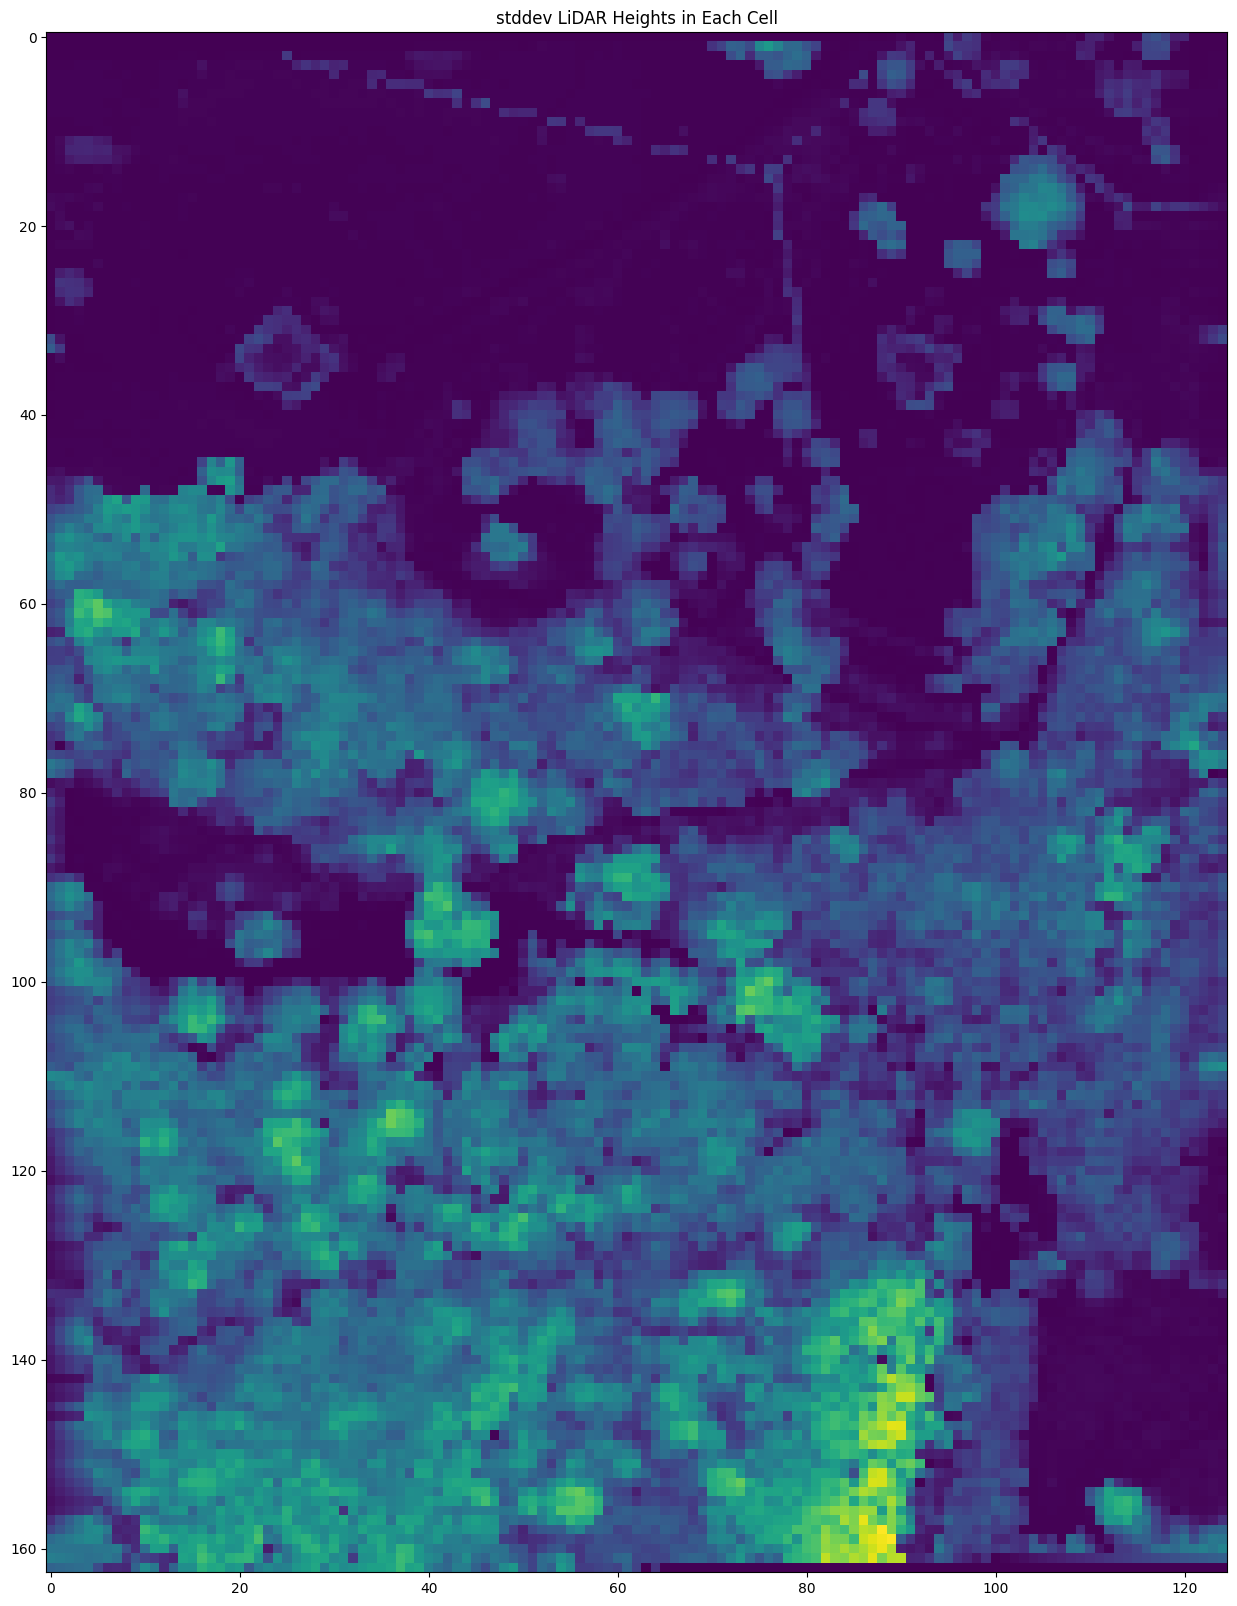

In [106]:
ldr.show_im(3)

In [107]:
ldr.save_png('fray_farm')
ldr.save_tiff('fray_farm')

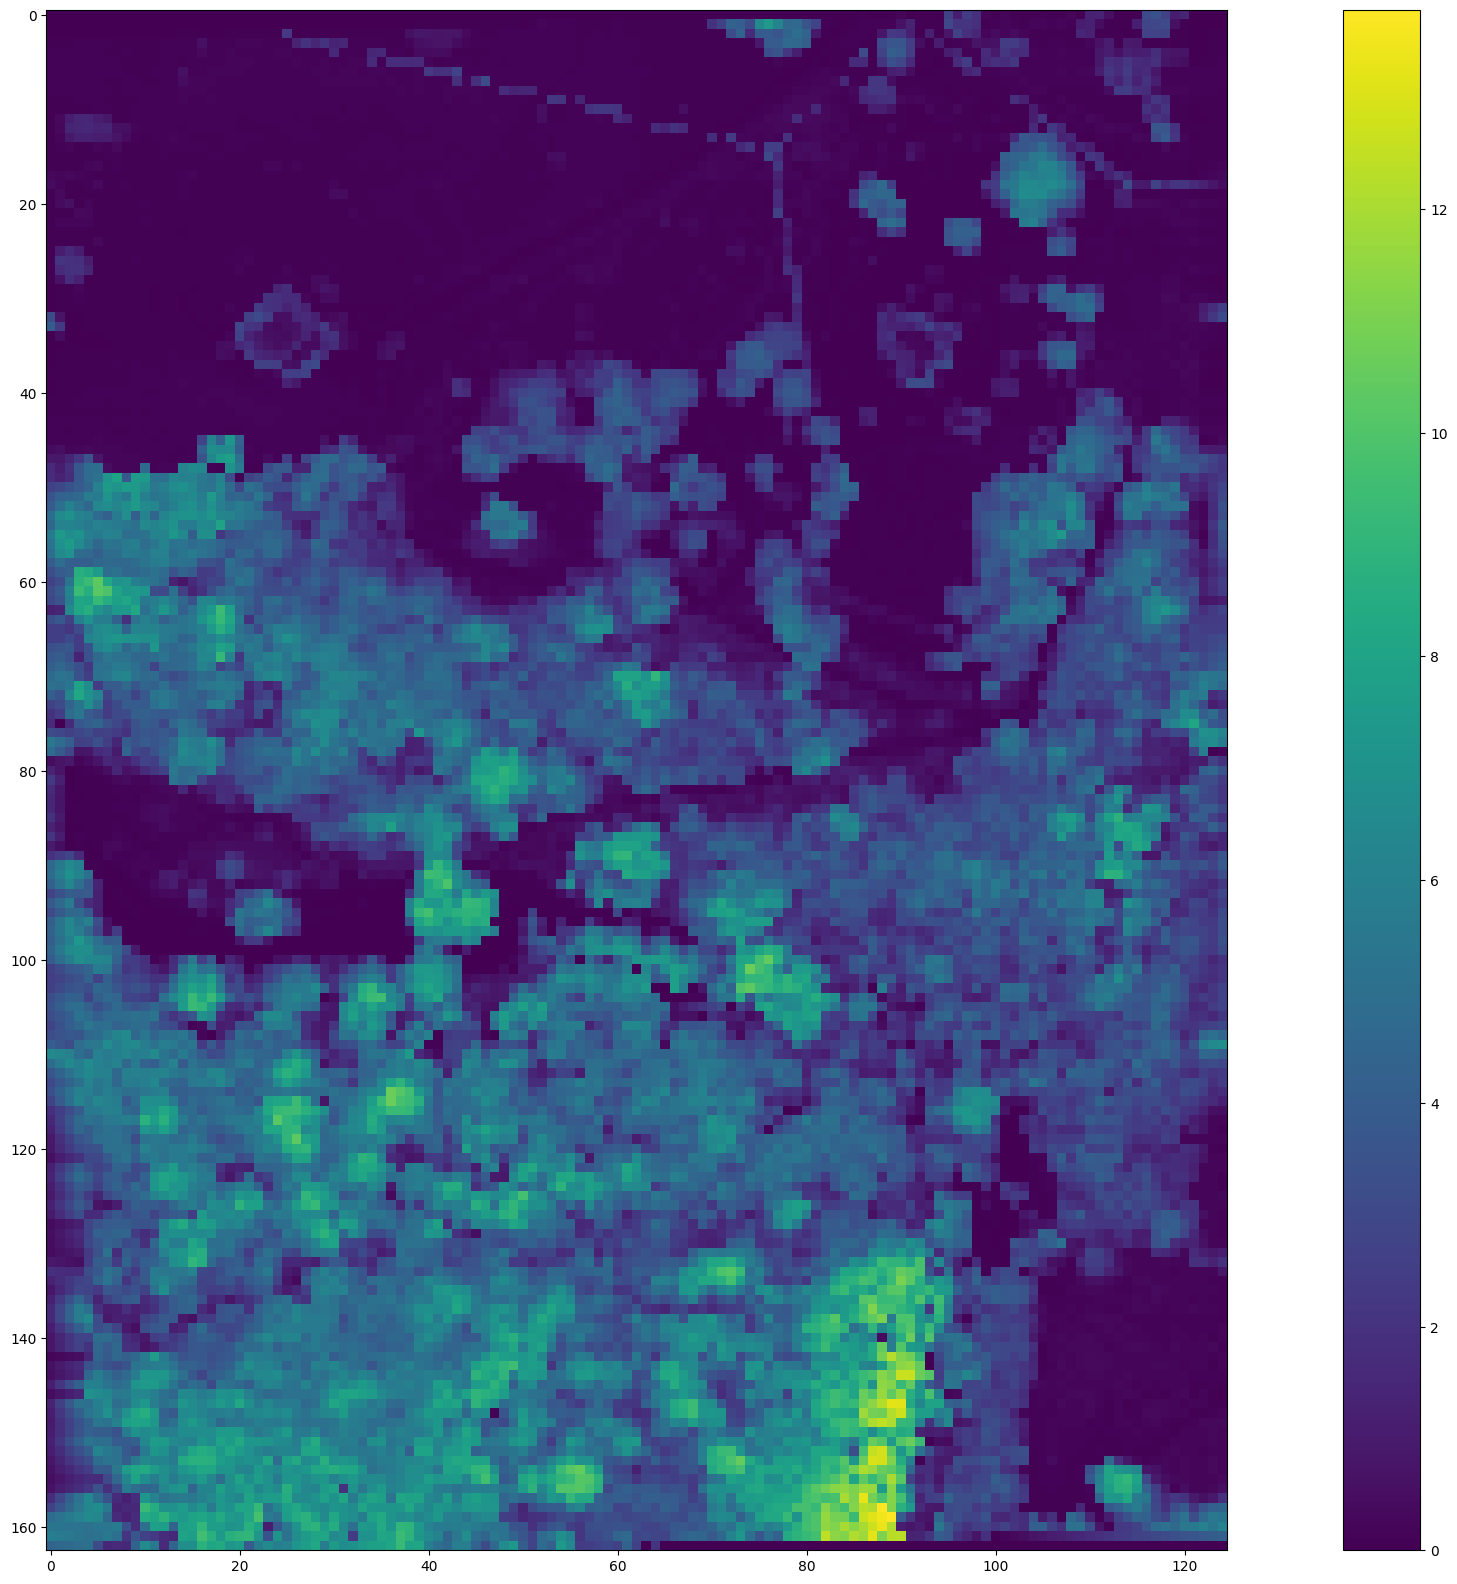

In [108]:
plt.imshow(ldr.grid_stddev);
plt.colorbar();

In [109]:
from scipy import signal
from scipy import ndimage

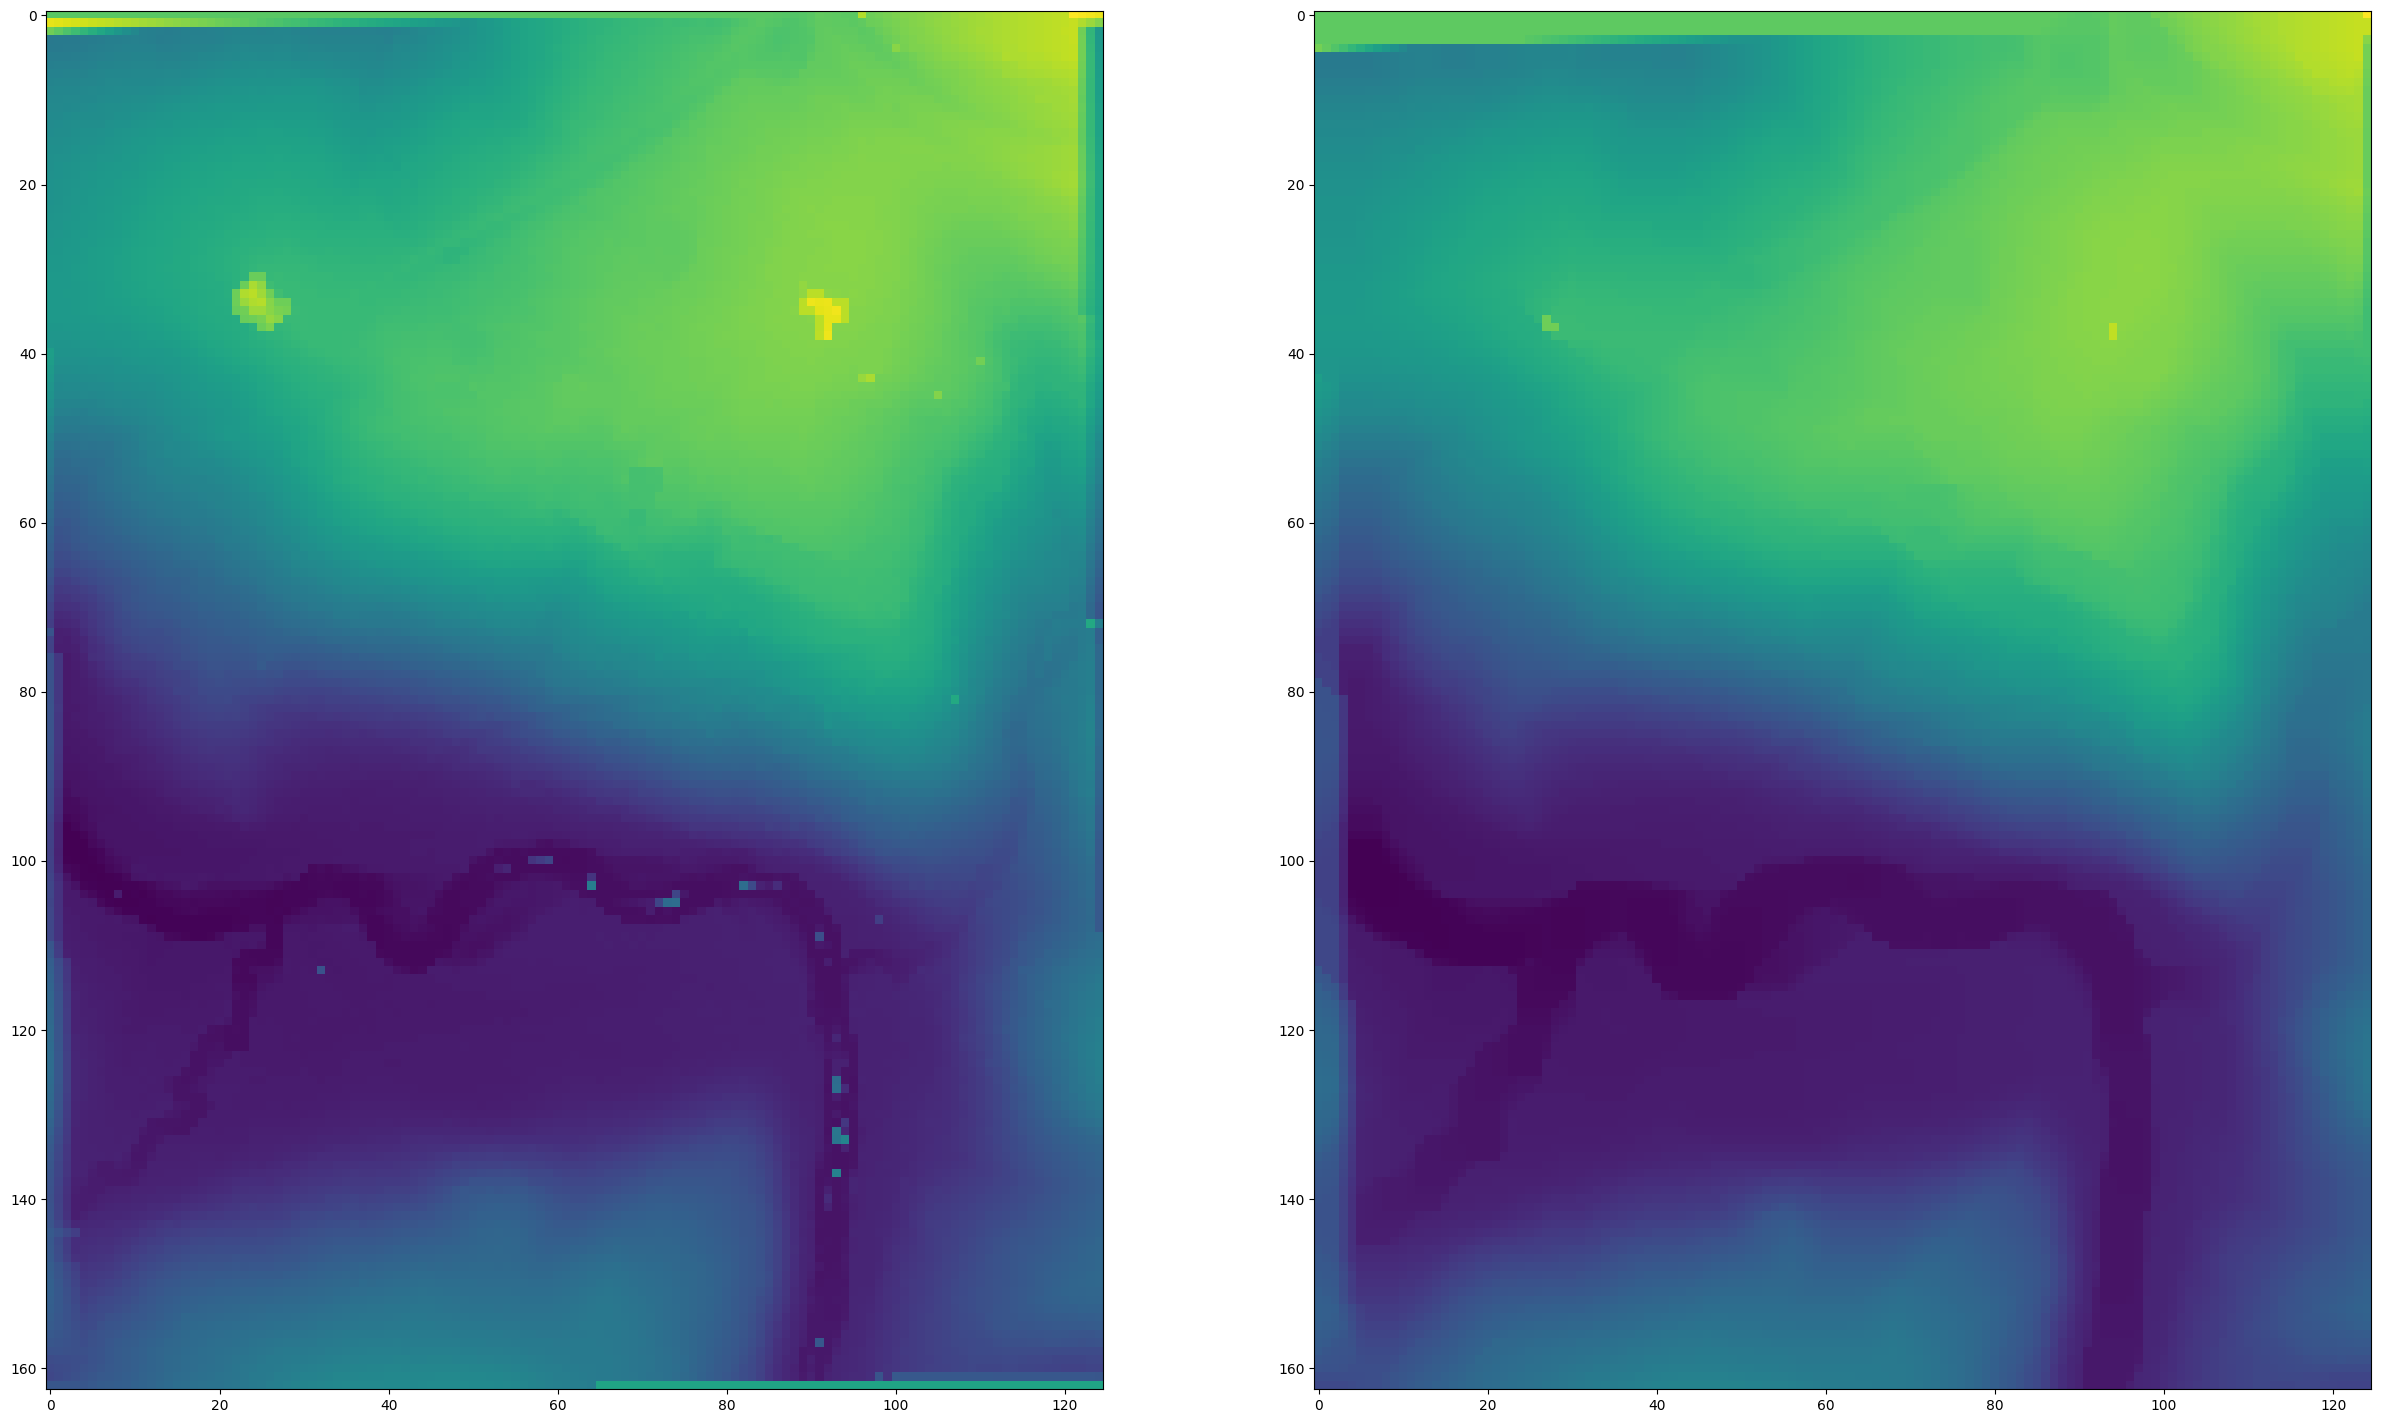

In [110]:
# minimum_filter median_filter
#dem = signal.medfilt2d(ldr.grid_min.T, kernel_size=3)
dem = ndimage.minimum_filter(ldr.grid_min, size=2)
dem = ndimage.median_filter(dem, size=2)
dem = ndimage.minimum_filter(dem, size=2)
dem = ndimage.median_filter(dem, size=2)
dem = ndimage.minimum_filter(dem, size=2)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ldr.grid_min);
ax2.imshow(dem);